# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install scipy 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | brookings
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | kikwit
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | san juan de miraflores
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | st. john's
Processing Record 14 of Set 1 | sciacca
Processing Record 15 of Set 1 | illizi
Processing Record 16 of Set 1 | manuel ojinaga
City not found. Skipping...
Processing Record 17 of Set 1 | diamantino
Processing Record 18 of Set 1 | barysh
Processing Record 19 of Set 1 | al jawf
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | viveiro
Processing Record 22 

Processing Record 40 of Set 4 | nguigmi
Processing Record 41 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 42 of Set 4 | stanley
Processing Record 43 of Set 4 | boguchany
Processing Record 44 of Set 4 | juneau
Processing Record 45 of Set 4 | sosnovo-ozerskoye
Processing Record 46 of Set 4 | shangri-la
City not found. Skipping...
Processing Record 47 of Set 4 | hrebinka
Processing Record 48 of Set 4 | chu
Processing Record 49 of Set 4 | dedougou
Processing Record 0 of Set 5 | nyurba
Processing Record 1 of Set 5 | badger
Processing Record 2 of Set 5 | susuman
Processing Record 3 of Set 5 | road town
Processing Record 4 of Set 5 | yanggu
Processing Record 5 of Set 5 | chul'man
Processing Record 6 of Set 5 | minas de marcona
Processing Record 7 of Set 5 | kataragama
City not found. Skipping...
Processing Record 8 of Set 5 | kavieng
Processing Record 9 of Set 5 | portland
Processing Record 10 of Set 5 | oxapampa
Processing Record 11 of Set 5 | nantucket
Processing Reco

Processing Record 30 of Set 8 | collie
Processing Record 31 of Set 8 | bejaia
Processing Record 32 of Set 8 | mugia
Processing Record 33 of Set 8 | bardai
Processing Record 34 of Set 8 | kurumkan
Processing Record 35 of Set 8 | sevastopol
Processing Record 36 of Set 8 | bamboo flat
Processing Record 37 of Set 8 | kavaratti
Processing Record 38 of Set 8 | codrington
Processing Record 39 of Set 8 | tobruk
Processing Record 40 of Set 8 | kushk
Processing Record 41 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 42 of Set 8 | naxos
Processing Record 43 of Set 8 | kaa-khem
Processing Record 44 of Set 8 | xuddur
Processing Record 45 of Set 8 | murzuq
Processing Record 46 of Set 8 | general acha
Processing Record 47 of Set 8 | srpska crnja
Processing Record 48 of Set 8 | aginskoye
Processing Record 49 of Set 8 | redencao
Processing Record 0 of Set 9 | sesheke
Processing Record 1 of Set 9 | kiboga
Processing Record 2 of Set 9 | jucas
Processing Record 3 of Set 9 | dun

Processing Record 19 of Set 12 | koulikoro
Processing Record 20 of Set 12 | trairi
Processing Record 21 of Set 12 | al mahwit
Processing Record 22 of Set 12 | celestun
Processing Record 23 of Set 12 | buri ram
Processing Record 24 of Set 12 | yeed
Processing Record 25 of Set 12 | giado
Processing Record 26 of Set 12 | zhelezinka
Processing Record 27 of Set 12 | central city
Processing Record 28 of Set 12 | cable beach
City not found. Skipping...
Processing Record 29 of Set 12 | ceres
Processing Record 30 of Set 12 | tobi village
City not found. Skipping...
Processing Record 31 of Set 12 | galle
Processing Record 32 of Set 12 | mendota heights
Processing Record 33 of Set 12 | zambezi
Processing Record 34 of Set 12 | necochea
Processing Record 35 of Set 12 | aykhal
Processing Record 36 of Set 12 | zaysan
Processing Record 37 of Set 12 | ibia
Processing Record 38 of Set 12 | tapa
Processing Record 39 of Set 12 | axim
Processing Record 40 of Set 12 | zhaobaoshan
Processing Record 41 of Set

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,13.57,46,100,6.71,AR,1697663234
1,waitangi,-43.9535,-176.5597,13.23,79,100,4.47,NZ,1697663234
2,college,64.8569,-147.8028,-1.03,82,100,3.09,US,1697663234
3,blackmans bay,-43.0167,147.3167,10.29,90,89,0.42,AU,1697663235
4,brookings,44.3114,-96.7984,12.00,82,100,6.69,US,1697663235


In [7]:
# Export the City_Data into a csv
import os
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
city_data_df.to_csv(os.path.join(output_dir, "cities.csv"), index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,13.57,46,100,6.71,AR,1697663234
1,waitangi,-43.9535,-176.5597,13.23,79,100,4.47,NZ,1697663234
2,college,64.8569,-147.8028,-1.03,82,100,3.09,US,1697663234
3,blackmans bay,-43.0167,147.3167,10.29,90,89,0.42,AU,1697663235
4,brookings,44.3114,-96.7984,12.00,82,100,6.69,US,1697663235


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

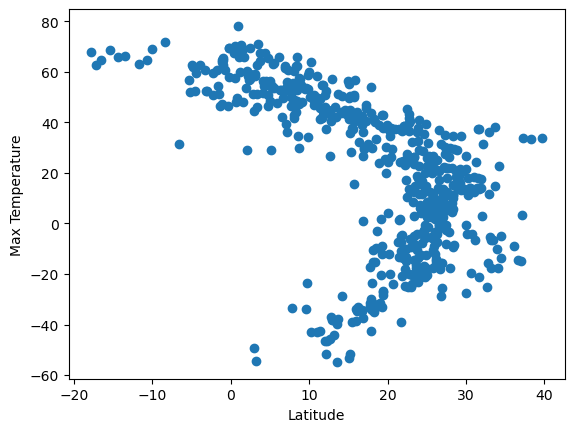

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

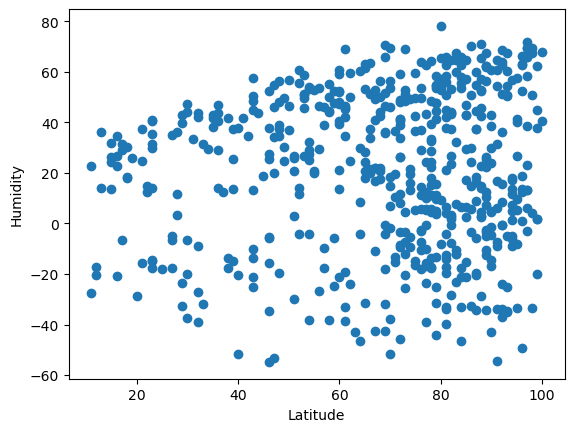

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

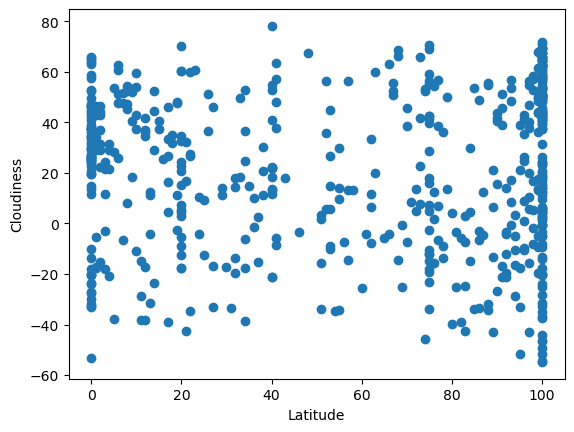

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

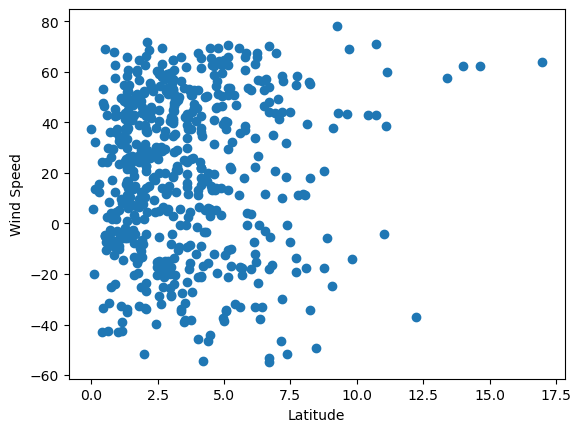

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,college,64.8569,-147.8028,-1.03,82,100,3.09,US,1697663234
4,brookings,44.3114,-96.7984,12.00,82,100,6.69,US,1697663235
5,longyearbyen,78.2186,15.6401,0.91,80,40,9.26,SJ,1697663235
12,st. john's,47.5649,-52.7093,8.42,79,6,1.34,CA,1697663237
13,sciacca,37.5082,13.0881,20.91,87,10,5.06,IT,1697663237


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,13.57,46,100,6.71,AR,1697663234
1,waitangi,-43.9535,-176.5597,13.23,79,100,4.47,NZ,1697663234
3,blackmans bay,-43.0167,147.3167,10.29,90,89,0.42,AU,1697663235
6,grytviken,-54.2811,-36.5092,3.20,91,100,4.22,GS,1697663235
7,kikwit,-5.0410,18.8162,21.75,94,100,0.53,CD,1697663236


###  Temperature vs. Latitude Linear Regression Plot

In [16]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))


NameError: name 'st' is not defined

In [ ]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))



Discussion about the linear relationship: There is a fairly strong negative correlation between temperature and latitude with a correlation coefficient of -0.8331545170614622 on Northern Hemisphere.
There is a relatively strong positive correlation between temperature and latitude with a correlation coefficient of  on 0.6878712331020929 Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

In [ ]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

**Discussion about the linear relationship:** There is a relatively weak positive correlation between humidity and latitude with a correlation coefficient of 0.11044208809141842 on Northern Hemisphere.
There is a relatively weak positive correlation correlation between humidity and latitude with a correlation coefficient of 0.08215561329261487 on Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

In [ ]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

**Discussion about the linear relationship:** There is a weak positive correlation between cloudiness and latitude with a correlation coefficient of 0.08771527471106945 on Northern Hemisphere.
There is a weak positive correlation between cloudiness and latitude with a correlation coefficient of 0.0881118207042492 on Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

In [ ]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

**Discussion about the linear relationship:** There is a negligible to almost no correlation between wind speed and latitude with a correlation coefficient of 0.19315626747640433 on Northern Hemisphere.
There is a weak negative correlation between wind speed and latitude with a correlation coefficient of -0.17433168275872246 on Southern Hemisphere.